In [16]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt

# Import classes and functions from the fits_metadata_extractor package
from fits_metadata_extractor.processor import FITSProcessor
from fits_metadata_extractor.utils import save_metadata_to_csv, load_metadata_from_csv
from fits_metadata_extractor.search import search_fits_by_point, search_fits_by_region
from fits_metadata_extractor.plotter import plot_moc_and_polygon_from_dataset_notebook, plot_search_region_and_find_fits
from fits_metadata_extractor.logger import setup_logging


In [17]:
# Initialize and configure logging
logger = setup_logging()


In [18]:
# Define the directory containing FITS files
fits_directory = "fits_collection"  # <-- CHANGE THIS PATH TO YOUR TEST FITS FILES DIRECTORY

# Define the output CSV file path
output_csv = 'test_metadata.csv'

# Define the directory to save plots
plot_output_dir = 'test_plots'

if not os.path.isdir(fits_directory):
    logger.error(f"The specified FITS directory does not exist: {fits_directory}")
else:
    logger.info(f"FITS directory found: {fits_directory}")


2024-11-28 13:21:58,190 - INFO - FITS directory found: fits_collection
2024-11-28 13:21:58,190 - INFO - FITS directory found: fits_collection


In [19]:
# Instantiate FITSProcessor with desired number of workers
processor = FITSProcessor(max_workers=5)

# Process the FITS directory
metadata_df = processor.process_fits_directory_parallel(fits_directory)


2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G327.617-0.364_I4.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/SN1987A_cut_35_smHB.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G327.617-0.364_I4.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G351.702+0.672_atlasgal.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/SN1987A_cut_35_smHB.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G351.702+0.672_atlasgal.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/5GHz_n_f.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G351.632-0.459_atlasgal.fits
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/5GHz_n_f.fits
2024-11-28 13:21:58,202 - INFO - Inferred object name 'G327.617-0.364' for file 'fits_collection/G327.617-0.364_I4.fits'.
2024-11-28 13:21:58,198 - INFO - Processing file: fits_collection/G351.63

In [20]:
# Show metadata_df content 

logger.info(f"Metadata DataFrame describe: {metadata_df.head()}")


2024-11-28 13:22:01,954 - INFO - Metadata DataFrame describe:                       FITS_File  \
0        G327.617-0.364_I4.fits   
1      SN1987A_cut_35_smHB.fits   
2  G351.632-0.459_atlasgal.fits   
3             SNaverage5-0.fits   
4                 5GHz_n_f.fits   

                                             Polygon  \
0  POLYGON ((327.7141602095 -0.4191667505, 327.51...   
1  POLYGON ((83.98078838261291 -69.31003927205, 8...   
2  POLYGON ((351.7458316825 -0.5191667704999999, ...   
3  POLYGON ((83.96216077193111 -69.30305555555553...   
4  POLYGON ((84.72666731996323 -69.13945793625412...   

                                                 MOC  \
0  9/2676076 10/10704293-10704295 10704300-107043...   
1                       9/2118062 10/8472237 8472239   
2  9/2716914-2716915 10/10867613 10867615 1086765...   
3                       9/2118062 10/8472237 8472239   
4                                         10/8472269   

                                      Polygon_Coords 

In [21]:
# Save the extracted metadata to CSV
save_metadata_to_csv(metadata_df, output_csv)


2024-11-28 13:22:01,983 - INFO - Metadata successfully saved to test_metadata.csv.
2024-11-28 13:22:01,983 - INFO - Metadata successfully saved to test_metadata.csv.


In [22]:
# Load the metadata from CSV
metadata_loaded_df = load_metadata_from_csv(output_csv)

2024-11-28 13:22:02,002 - INFO - Metadata loaded from test_metadata.csv.
2024-11-28 13:22:02,002 - INFO - Metadata loaded from test_metadata.csv.


In [23]:
# Test plotting using plot_moc_and_polygon_from_dataset_notebook
logger.info("Testing plotting of MOCs and polygons.")

try:
    plot_moc_and_polygon_from_dataset_notebook(
        metadata_df=metadata_loaded_df,
        input_dir=fits_directory,
        output_dir=plot_output_dir,
        max_plots=2  # Limit to 5 plots for testing
    )
    logger.info("Finished plotting MOCs and polygons.")
except Exception as e:
    logger.error(f"Error occurred during plotting: {e}")


2024-11-28 13:22:02,019 - INFO - Testing plotting of MOCs and polygons.
2024-11-28 13:22:02,019 - INFO - Testing plotting of MOCs and polygons.
2024-11-28 13:22:02,020 - INFO - Plots will be saved to: test_plots
2024-11-28 13:22:02,020 - INFO - Plots will be saved to: test_plots
2024-11-28 13:22:02,021 - INFO - No specific selection criteria provided. All FITS files will be plotted.
2024-11-28 13:22:02,021 - INFO - No specific selection criteria provided. All FITS files will be plotted.
2024-11-28 13:22:02,022 - INFO - Generating 2 plots.
2024-11-28 13:22:02,022 - INFO - Generating 2 plots.


Generating Plots:   0%|          | 0/2 [00:00<?, ?it/s]

2024-11-28 13:22:02,093 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 13:22:02,093 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 13:22:03,053 - INFO - Plot saved as G327.617-0.364_I4.png
2024-11-28 13:22:03,053 - INFO - Plot saved as G327.617-0.364_I4.png
2024-11-28 13:22:03,054 - INFO - Plot saved: test_plots/G327.617-0.364_I4.png
2024-11-28 13:22:03,054 - INFO - Plot saved: test_plots/G327.617-0.364_I4.png
2024-11-28 13:22:03,122 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 13:22:03,122 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 13:22:03,905 - INFO - Plot saved as SN1987A_cut_35_smHB.png
2024-11-28 13:22:03,905 - INFO - Plot saved as SN1987A_cut_35_smHB.png
2024-11-28 13:22:03,906 - INFO - Plot saved: test_plots/SN1987A_cut_35_smHB.png
2024-11-28 13:22:03,906 - INFO - Plot saved: test_plots/SN1987A_cut_35_smHB.png
2024-11-28 13:22:03,907 - INFO - Finished plotting MOCs and polygons.
2024-11-28 13:22:03,907 - INFO - Finis

In [24]:
# Define a test point
test_point = {
    'ra': 150.0,  # Right Ascension in degrees
    'dec': 2.2    # Declination in degrees
}

logger.info(f"Testing search by point: RA={test_point['ra']}, Dec={test_point['dec']}")

# Perform the search
matching_fits_by_point = search_fits_by_point(metadata_loaded_df, test_point['ra'], test_point['dec'])

# Display results
if not matching_fits_by_point.empty:
    logger.info(f"FITS files containing the point (RA={test_point['ra']}, Dec={test_point['dec']}):")
    display(matching_fits_by_point[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found containing the specified point.")


2024-11-28 13:22:03,925 - INFO - Testing search by point: RA=150.0, Dec=2.2
2024-11-28 13:22:03,925 - INFO - Testing search by point: RA=150.0, Dec=2.2
2024-11-28 13:22:03,949 - INFO - No FITS files found containing the specified point.
2024-11-28 13:22:03,949 - INFO - No FITS files found containing the specified point.


In [25]:
# Define a test circular region
test_circle = {
    'type': 'circle',
    'center': (270.0, -29),  # Center RA and Dec in degrees
    'radius': 5          # Radius in degrees
}

logger.info(f"Testing search by circular region: Center RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees")

# Perform the search
matching_fits_by_circle = search_fits_by_region(metadata_loaded_df, test_circle)

# Display results
if not matching_fits_by_circle.empty:
    logger.info(f"FITS files intersecting the circular region (RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees):")
    display(matching_fits_by_circle[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified circular region.")


2024-11-28 13:22:03,955 - INFO - Testing search by circular region: Center RA=270.0, Dec=-29, Radius=5 degrees
2024-11-28 13:22:03,955 - INFO - Testing search by circular region: Center RA=270.0, Dec=-29, Radius=5 degrees
2024-11-28 13:22:03,963 - INFO - FITS files intersecting the circular region (RA=270.0, Dec=-29, Radius=5 degrees):
2024-11-28 13:22:03,963 - INFO - FITS files intersecting the circular region (RA=270.0, Dec=-29, Radius=5 degrees):


,FITS_File,Resolved_Object
11,av_galcen_2mass.fits,Unknown
13,av_galcen_spitzer.fits,Unknown
15,id12_GAL-Survey-GC.fpsf.fits,Unknown


In [26]:
# Define a test polygonal region
test_polygon = {
    'type': 'polygon',
    'coordinates': [
    (180, -60),  # Bottom-Left Corner
    (180, 60),   # Top-Left Corner
    (280, 60),   # Top-Right Corner
    (280, -60)   # Bottom-Right Corner
    ]
}

logger.info(f"Testing search by polygonal region with coordinates: {test_polygon['coordinates']}")

# Perform the search
matching_fits_by_polygon = search_fits_by_region(metadata_loaded_df, test_polygon)

# Display results
if not matching_fits_by_polygon.empty:
    logger.info("FITS files intersecting the polygonal region:")
    display(matching_fits_by_polygon[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified polygonal region.")


2024-11-28 13:22:03,972 - INFO - Testing search by polygonal region with coordinates: [(180, -60), (180, 60), (280, 60), (280, -60)]
2024-11-28 13:22:03,972 - INFO - Testing search by polygonal region with coordinates: [(180, -60), (180, 60), (280, 60), (280, -60)]
2024-11-28 13:22:03,978 - INFO - FITS files intersecting the polygonal region:
2024-11-28 13:22:03,978 - INFO - FITS files intersecting the polygonal region:


,FITS_File,Resolved_Object
0,G327.617-0.364_I4.fits,G327.617-0.364
2,G351.632-0.459_atlasgal.fits,G351.632-0.459
5,UGC_09618_S_2MASS_H.fits,Unknown
7,N2.20100426.52760.fits,Unknown
8,NGC_4486_MIPS_M1.fits,Unknown
9,G351.702+0.672_atlasgal.fits,Unknown
11,av_galcen_2mass.fits,Unknown
13,av_galcen_spitzer.fits,Unknown
15,id12_GAL-Survey-GC.fpsf.fits,Unknown
17,G9_POLIN.fit,Unknown


2024-11-28 13:22:44,124 - INFO - Plots will be saved to: search_plots
2024-11-28 13:22:44,124 - INFO - Plots will be saved to: search_plots
2024-11-28 13:22:44,136 - INFO - Generating plots for 7 matching FITS files.
2024-11-28 13:22:44,136 - INFO - Generating plots for 7 matching FITS files.


Plotting FITS Coverages:   0%|          | 0/7 [00:00<?, ?it/s]

2024-11-28 13:22:45,186 - INFO - Search region and matching FITS coverages plotted and saved to 'search_plots/search_region_and_fits.png'
2024-11-28 13:22:45,186 - INFO - Search region and matching FITS coverages plotted and saved to 'search_plots/search_region_and_fits.png'


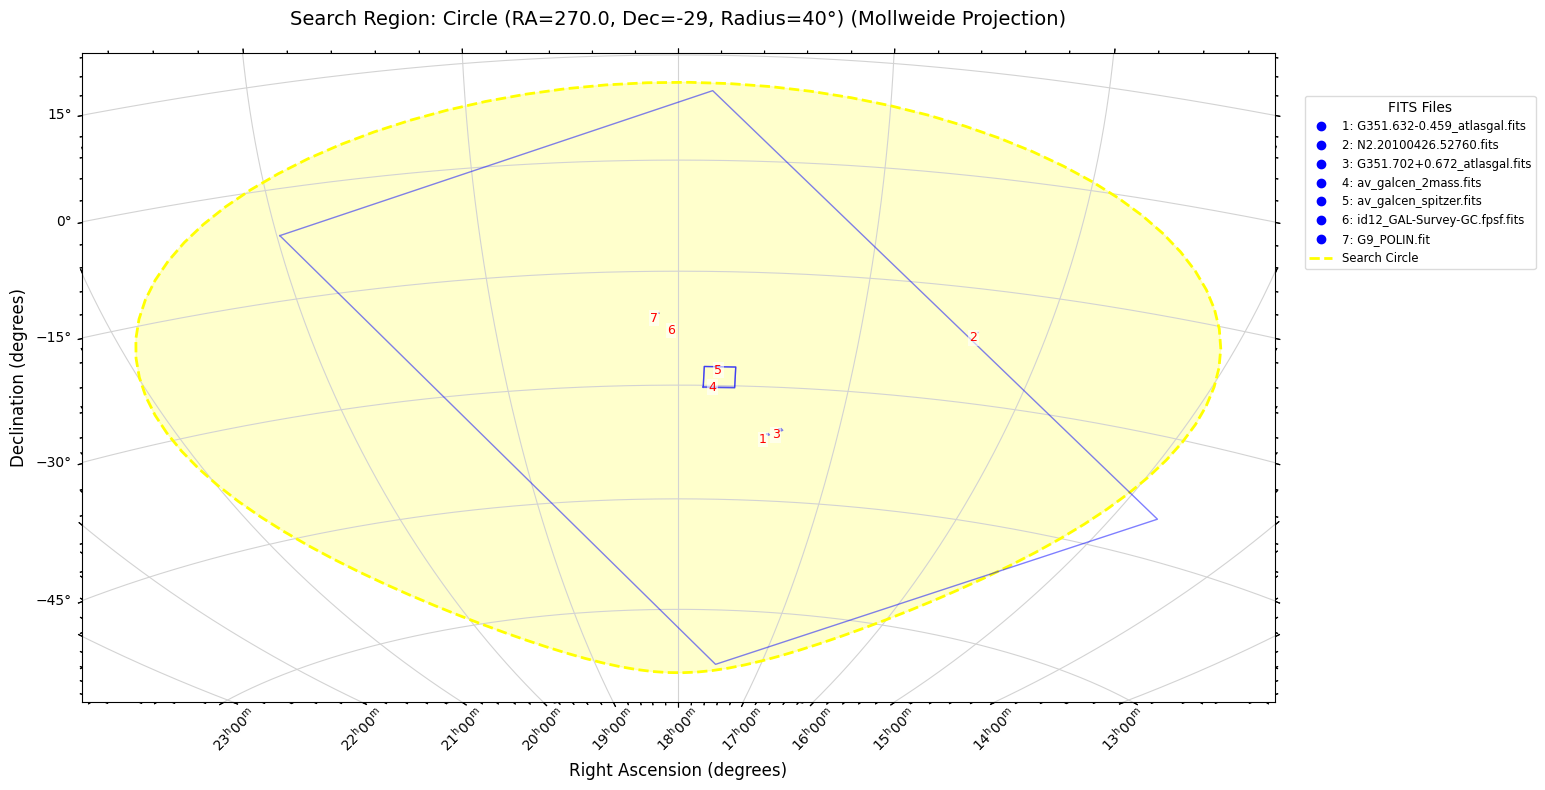

In [29]:
# Define a search region (e.g., a circle)
search_region = {
    'type': 'circle',
    'center': (270.0, -29),  # RA=150.0°, Dec=2.2°
    'radius': 40           # 5 degrees radius
}

# Call the plotting function
plot_search_region_and_find_fits(
    metadata_df=metadata_df,
    region=search_region,
    input_dir='fits_collection',
    output_dir='search_plots',
    max_plots=10,
    plot_search_region=True
)